Na přednášce jsme viděli "jednoduchý genetický algoritmus" (SGA). Nyní použijeme tento algoritmus k řešení dvou jednoduchých problémů - OneMAX a subset sum.

Nakonec ukážeme knihovnou `deap`, která může být použita pro implementaci složitějších evolučních algoritmů.

Implementace je jednoduchá, začneme s high-level verzí algoritmu (vypadá v podstatě jako pseudo-kód).

In [1]:
import numpy as np

def evolution(pop_size, ind_size, max_gen, fitness, cx_pb = 0.8, mut_pb=0.1, per_bit_pb = 0.2):
    population = random_population(pop_size, ind_size)
    log = []
    
    for i in range(max_gen):
        fit = [fitness(ind) for ind in population]
        log.append(max(fit))
        mating_pool = selection(population, fit, pop_size)
        offspring = crossover(mating_pool, cx_pb)
        offspring = mutation(offspring, mut_pb, per_bit_pb)
        population = offspring[:] # shallow copy
    
    fit = list(map(fitness, population))
    best = population[np.argmax(fit)]
    return best, population, log

Nyní je potřeba naimplementovat výše použité funkce. Začneme s inicializací náhodné populace jedninců. Jedinci budou seznamy 1 a 0.

In [2]:
import random

def random_population(pop_size, ind_size):
    pop = []
    for _ in range(pop_size):
        ind = [0 if random.random() < 0.5 else 1 for _ in range(ind_size)]
        pop.append(ind)
    
    return pop

random_population(5, 10)

[[1, 1, 0, 0, 0, 1, 0, 1, 0, 1],
 [0, 0, 1, 0, 1, 0, 1, 1, 0, 0],
 [1, 1, 1, 0, 1, 1, 1, 1, 0, 0],
 [1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
 [0, 0, 0, 0, 0, 0, 1, 0, 1, 1]]

Dále naimplementujeme ruletovou selekci - knihovna `random` nám to hodně usnadní:

In [3]:
import copy

def selection(pop, fit, N):
    return copy.deepcopy(random.choices(pop, weights=fit, k=N)) # make a deep copy so that
                                                                # we have unique indivduals

Zbývá jednobodové křížení a mutace, která mění náhodné bity (bit flip). Obě funkce berou za argument celou populaci.

In [4]:
def crossover(pop, cx_pb = 0.8):
    new_pop = []
    for i in range(len(pop)//2):
        
        o1 = copy.deepcopy(pop[2*i])
        o2 = copy.deepcopy(pop[2*i + 1])
        
        if random.random() < cx_pb: # crossover probability
            point = random.randrange(0, len(o1))
            o2_start = o2[:point]
            o2[:point] = o1[:point]
            o1[:point] = o2_start[:]
        
        new_pop.append(o1)
        new_pop.append(o2)
    
    return new_pop

def mutation(pop, mut_pb = 0.1, per_bit_pb = 0.2):
    new_pop = []
    for ind in pop:
        
        o = copy.deepcopy(ind)
        
        if random.random() < mut_pb: # mutation probability
            o = [1-x if random.random() < per_bit_pb else x for x in o] # change the bit to the othex value with per_bit_pb probability
        
        new_pop.append(o)
    
    return new_pop

import pprint
pop = random_population(6, 10)
print('population')
pprint.pprint(pop)
print('after crossover')
pprint.pprint(crossover(pop))
print('after mutation')
pprint.pprint(mutation(pop, mut_pb=1.0))

population
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 1, 1, 1, 0, 0, 1, 1, 0, 0],
 [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
 [0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
 [0, 1, 0, 1, 1, 1, 0, 1, 0, 1]]
after crossover
[[0, 1, 0, 0, 0, 0, 1, 1, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
 [0, 1, 1, 1, 0, 0, 1, 1, 0, 0],
 [0, 1, 0, 1, 1, 1, 0, 1, 1, 0],
 [0, 1, 0, 1, 0, 0, 1, 0, 0, 1]]
after mutation
[[0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
 [0, 1, 0, 0, 1, 0, 1, 1, 0, 0],
 [0, 1, 1, 1, 0, 0, 1, 1, 0, 0],
 [1, 0, 1, 0, 0, 0, 1, 0, 0, 1],
 [0, 1, 1, 0, 1, 0, 1, 0, 0, 1],
 [1, 1, 0, 1, 1, 1, 0, 1, 0, 0]]


To je vše co v algoritmu potřebujeme. Zbývá už jen fitness funkce pro daný problém. V OneMAX problému chceme co nejvíce jedniček - fitness tedy bude počet 1 v jedinci.

In [5]:
def onemax(ind):
    return sum(ind)

pop = random_population(6, 10)
fit = [onemax(ind) for ind in pop]
for i,f in zip(pop, fit):
    print((i, f))

([1, 0, 0, 0, 0, 0, 1, 0, 1, 1], 4)
([0, 1, 0, 0, 1, 0, 1, 0, 0, 0], 3)
([0, 1, 1, 0, 1, 0, 1, 0, 1, 1], 6)
([0, 1, 0, 0, 0, 1, 0, 1, 0, 0], 3)
([1, 1, 0, 1, 0, 0, 1, 1, 1, 0], 6)
([0, 1, 1, 0, 0, 1, 0, 1, 1, 0], 5)


Nyní pustíme a vyhodnotíme algoritmus!

In [6]:
best, pop, log = evolution(pop_size = 100, ind_size = 50, max_gen = 50, fitness = onemax)

best fitness:  42
best:  [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0]


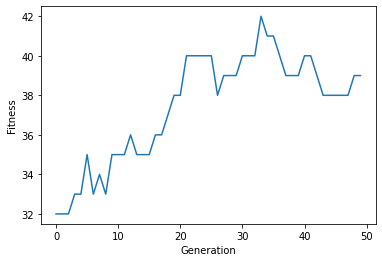

In [7]:
print('best fitness: ', onemax(best))
print('best: ', best)


%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(log)
plt.ylabel('Fitness')
plt.xlabel('Generation')
plt.show()

## A teď vy!

Upravte algoritmus výše tak, aby řešil subset sum problem. Tedy - nalezněte podmožinu zadané množiny tak, aby suma jejích hodnot byla rovna danému číslu. My řešíme navíc optimalizační verzi problému - snažíme se minimalizovat rozdíl mezi sumou podmnožiny a danou hodnotou.

Instanci problému si vygenerujeme náhodně:

In [8]:
ind_size = 100  # try 1000
input_set = [random.randrange(0,50) + 100 for _ in range(ind_size)] # ind_size random numbers between 100 and 150
number = sum(input_set)//2

total = sum(input_set)

print(number, input_set)

6119 [141, 131, 102, 124, 101, 139, 114, 102, 127, 141, 142, 109, 141, 112, 142, 103, 109, 133, 114, 120, 135, 143, 132, 100, 115, 116, 100, 106, 138, 111, 123, 142, 116, 134, 119, 114, 129, 144, 124, 126, 129, 100, 101, 113, 142, 103, 146, 124, 126, 115, 147, 115, 105, 119, 102, 142, 144, 127, 140, 102, 147, 142, 149, 144, 111, 123, 118, 116, 146, 120, 118, 138, 112, 133, 119, 145, 110, 100, 130, 112, 108, 102, 123, 112, 136, 109, 120, 104, 103, 128, 126, 133, 102, 114, 124, 100, 136, 121, 115, 133]


In [9]:
import numpy as np


# You can also work with np.arrays and multiply the input_set with it
def get_subset(ind):
    return [input_set[i] for i, val in enumerate(ind) if val > 0.1]


# or choose a different fitness, e.g. 1 / (diff + 1), squared error...
def subset_sum_fitness(ind):
    return total - objective(ind)

# this is what we want to minimize
def objective(ind):
    return np.abs(sum(get_subset(ind)) - number)


def get_overall_best(overall_best, fitness_best, population, fitnesses):
    best_id = np.argmax(fitnesses)
    best = population[best_id]
    best_fit = fitnesses[best_id]
    
    if overall_best is None:
        overall_best = best
        fitness_best = best_fit
    else:
        overall_best = overall_best if best_fit <= fitness_best else best
        fitness_best = fitness_best if best_fit <= fitness_best else best_fit

    return overall_best, fitness_best


def evolution(pop_size, ind_size, max_gen, fitness, cx_pb = 0.8, mut_pb=0.1, per_bit_pb = 0.2):
    population = random_population(pop_size, ind_size)
    log = []
    
    overall_log = []
    fitness_best = None
    overall_best = None
    
    for i in range(max_gen):
        fit = [fitness(ind) for ind in population]
        log.append(max(fit))
        
        # also log overall best individual
        overall_best, fitness_best = get_overall_best(overall_best, fitness_best, population, fit)
        overall_log.append(objective(overall_best))

        mating_pool = selection(population, fit, pop_size)
        offspring = crossover(mating_pool, cx_pb)
        offspring = mutation(offspring, mut_pb, per_bit_pb)
        population = offspring[:] # shallow copy
    
    fit = list(map(fitness, population))
    best = population[np.argmax(fit)]
    return best, population, log, overall_best, overall_log

best fitness:  12238
best number:  6119 | given number:  6119
best diff:  0


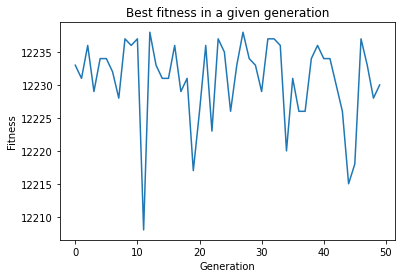

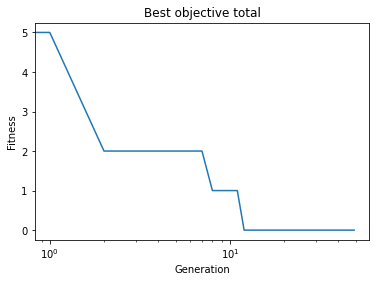

In [11]:
best, pop, log, overall, overall_log = evolution(pop_size = 100, ind_size = ind_size, max_gen = 50, fitness = subset_sum_fitness)

print('best fitness: ', subset_sum_fitness(overall))
print('best number: ', sum(get_subset(overall)), "| given number: ", number)
print('best diff: ', sum(get_subset(overall)) - number)


%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(log)
plt.ylabel('Fitness')
plt.xlabel('Generation')
plt.title("Best fitness in a given generation")
plt.show()

plt.plot(overall_log)
plt.ylabel('Fitness')
plt.xlabel('Generation')
plt.title("Best objective total")
plt.xscale('log')
plt.show()

In [ ]:
# Questions
# 1. why does it fluctuate?
# 2. should I always save the individual with the best possible fitness?
# 3. a different fitness?

# brainstorming - different operators? what's better here - crossover, or bit flip?

## Knihovna `deap`

Viděli jsme, že implementace evolučního algoritmu je snadná. Často je ale dobré použít existující knihovnu pro zjednoduší implementace a vyhnutí s bugům. Jedna taková knihovna je `deap`. Má pěkné tutoriály, například ten, který se [zabývá stejným problémem, jako jsme řešili][1].

Její další výhody jsou to, že má i pokročilejší metody - například genetické programování nebo vícekriteriální optimalizace.

  [1]: https://deap.readthedocs.io/en/master/examples/ga_onemax.html